In [427]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import zscore, stats

In [428]:
traincam = pd.read_csv('train_sdss_camera.csv')
trainsky = pd.read_csv('train_sky_position.csv')
testcam = pd.read_csv('test_sdss_camera.csv')
testsky = pd.read_csv('test_sky_position.csv')

In [429]:
sample = pd.read_csv('sample_submission.csv')
sample

,id,object_type
0,18001,STAR
1,18002,STAR
2,18003,STAR
3,18004,STAR
4,18005,STAR
...,...,...
11995,29996,STAR
11996,29997,STAR
11997,29998,STAR
11998,29999,STAR


In [430]:
train_data = traincam.merge(trainsky,on='id', how='left')

In [431]:
train_data

,id,u,g,r,i,z,run,rerun,camcol,field,ra,dec,sky_zone,object_type
0,1,18.45886,17.24552,16.65724,16.27922,16.07007,3712,301,5,198,214.002267,54.488814,I,GALAXY
1,2,18.50274,17.50821,17.19507,17.07868,17.08054,3705,301,6,131,220.688333,53.185834,I,STAR
2,3,18.69451,17.30333,16.48301,16.05570,15.75763,5323,301,5,140,249.118754,12.091483,E,GALAXY
3,4,19.34373,18.32701,17.97602,17.82627,17.75770,8108,301,4,57,330.633293,18.920049,C,STAR
4,5,19.33328,18.13790,17.58180,17.21341,16.99397,4187,301,2,107,NaN,-0.813704,C,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,19.07518,19.04164,18.97759,18.69354,18.71167,3958,301,5,35,235.370451,38.001041,G,QUASAR
17996,17997,17.45299,15.95391,15.18684,14.75107,14.41128,5314,301,2,260,216.986622,16.389357,E,GALAXY
17997,17998,19.58603,19.33562,19.12988,18.97954,19.03011,4682,301,2,239,259.534158,38.102033,G,QUASAR
17998,17999,16.87792,15.76577,15.39156,15.24989,15.22452,2125,301,2,278,160.472715,3.796510,B,STAR


In [432]:
for i in range(len(train_data['id'])):
    if train_data['object_type'][i] == 'GALAXY':
        train_data['object_type'][i] = 1
    elif train_data['object_type'][i] == 'STAR':
        train_data['object_type'][i] = 2
    else:
        train_data['object_type'][i] = 3

In [433]:

cols = train_data.select_dtypes('number').columns  # limits to a (float), b (int) and e (timedelta)
df_sub = train_data.loc[:, cols]


# OPTION 1: z-score filter: z-score < 3
lim = np.abs((df_sub - df_sub.mean()) / df_sub.std(ddof=0)) < 3

In [434]:
train_data.loc[:, cols] = df_sub.where(lim, np.nan)

In [435]:
train_data['ra']=train_data[['ra','sky_zone']].apply(f1,axis=1)

In [436]:
train_data=train_data.drop(['rerun'],axis = 1)

In [437]:
train_data = train_data.dropna()

In [438]:
train_data.head(22)

,id,u,g,r,i,z,run,camcol,field,ra,dec,sky_zone,object_type
0,1,18.45886,17.24552,16.65724,16.27922,16.07007,3712,5,198.0,214.002267,54.488814,I,1
1,2,18.50274,17.50821,17.19507,17.07868,17.08054,3705,6,131.0,220.688333,53.185834,I,2
2,3,18.69451,17.30333,16.48301,16.05570,15.75763,5323,5,140.0,249.118754,12.091483,E,1
3,4,19.34373,18.32701,17.97602,17.82627,17.75770,8108,4,57.0,330.633293,18.920049,C,2
4,5,19.33328,18.13790,17.58180,17.21341,16.99397,4187,2,107.0,339.020089,-0.813704,C,1
5,6,18.12876,17.20399,16.86027,16.57519,16.44839,4858,1,461.0,16.005079,-0.855938,J,1
6,7,18.31343,17.18547,16.74916,16.56921,16.47262,2986,2,301.0,183.477288,6.292662,F,2
7,8,18.34997,18.16349,18.01111,18.07979,18.20549,2243,1,266.0,165.191274,57.236817,A,3
8,9,19.19889,17.30230,16.39202,15.96983,15.63067,3893,2,93.0,168.731466,40.716772,A,1
9,10,19.20559,17.97837,17.21518,16.80125,16.57013,3530,3,293.0,164.608628,45.614735,D,1


In [439]:
test_data = testcam.merge(testsky,on='id', how='left')

In [440]:
test_data

,id,u,g,r,i,z,run,rerun,camcol,field,ra,dec,sky_zone
0,18001,17.77804,16.40338,15.69551,15.51029,15.41648,6585,301.0,4,146,105.295891,29.857393,H
1,18002,19.17646,18.08458,17.01220,16.35536,15.94323,5115,301.0,3,55,178.795262,27.223414,F
2,18003,18.97518,17.53847,16.98310,16.66949,16.62293,1412,301.0,4,294,226.759800,61.228082,I
3,18004,19.48538,17.55220,16.57528,16.13803,15.76700,2826,NaN,2,268,177.735503,56.820679,A
4,18005,19.09216,17.81581,17.10279,16.66293,16.48639,3704,301.0,6,16,132.988928,30.463367,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,29996,19.36869,18.00328,18.08442,18.19245,18.25524,4134,NaN,2,92,292.277001,77.523831,G
11996,29997,17.91410,16.40229,15.63961,15.17997,14.90172,3704,301.0,6,14,132.478684,30.383597,H
11997,29998,19.19980,17.49400,16.54597,16.02917,15.60198,7917,301.0,3,231,20.388668,21.656181,J
11998,29999,18.94944,17.76070,17.59710,17.55043,17.55842,2335,301.0,6,94,258.789492,33.311637,G


In [441]:
galaxy = train_data[train_data['object_type']==1]
galaxy

,id,u,g,r,i,z,run,camcol,field,ra,dec,sky_zone,object_type
0,1,18.45886,17.24552,16.65724,16.27922,16.07007,3712,5,198.0,214.002267,54.488814,I,1
2,3,18.69451,17.30333,16.48301,16.05570,15.75763,5323,5,140.0,249.118754,12.091483,E,1
4,5,19.33328,18.13790,17.58180,17.21341,16.99397,4187,2,107.0,339.020089,-0.813704,C,1
5,6,18.12876,17.20399,16.86027,16.57519,16.44839,4858,1,461.0,16.005079,-0.855938,J,1
8,9,19.19889,17.30230,16.39202,15.96983,15.63067,3893,2,93.0,168.731466,40.716772,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17988,17989,19.36458,17.75704,16.97619,16.49094,16.09658,4263,4,324.0,31.264780,0.175134,J,1
17990,17991,18.53707,16.99193,16.24483,15.85866,15.57990,4576,1,302.0,159.248872,31.108833,D,1
17991,17992,19.18985,17.89170,17.44497,17.15260,17.10248,5330,2,40.0,234.803943,14.361008,E,1
17996,17997,17.45299,15.95391,15.18684,14.75107,14.41128,5314,2,260.0,216.986622,16.389357,E,1


In [442]:
galaxy.describe()

,id,u,g,r,i,z,run,camcol,field,ra,dec
count,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000,8813.000000
mean,8985.802791,18.792700,17.331241,16.632464,16.259151,16.007603,3800.100533,3.255532,182.859639,181.992096,25.362724
std,5179.982854,0.681798,0.750228,0.832564,0.867386,0.927760,1544.047196,1.601837,124.695345,64.038977,19.943227
min,1.000000,16.138730,14.476330,13.512680,13.043850,12.699370,745.000000,1.000000,11.000000,0.038054,-11.189828
25%,4537.000000,18.454830,16.946780,16.162460,15.749420,15.434100,2826.000000,2.000000,87.000000,149.413423,7.488645
50%,9008.000000,18.984650,17.472360,16.702870,16.313170,16.036900,3840.000000,3.000000,155.000000,183.477288,23.623520
75%,13451.000000,19.314160,17.873930,17.265630,16.921020,16.712770,4674.000000,5.000000,249.000000,220.325780,40.750115
max,18000.000000,19.599790,19.974990,19.506970,20.002060,19.934330,8157.000000,6.000000,615.000000,359.719626,76.751560


In [443]:
train_data['train_test'] = 1
test_data['train_test'] = 0
test_data['object_type'] = np.NaN
all_data = pd.concat([train_data,test_data])

%matplotlib inline
all_data.columns

Index(['id', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'ra', 'dec',
       'sky_zone', 'object_type', 'train_test', 'rerun'],
      dtype='object')

In [444]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17141 entries, 0 to 17999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17141 non-null  int64  
 1   u            17141 non-null  float64
 2   g            17141 non-null  float64
 3   r            17141 non-null  float64
 4   i            17141 non-null  float64
 5   z            17141 non-null  float64
 6   run          17141 non-null  int64  
 7   camcol       17141 non-null  int64  
 8   field        17141 non-null  float64
 9   ra           17141 non-null  float64
 10  dec          17141 non-null  float64
 11  sky_zone     17141 non-null  object 
 12  object_type  17141 non-null  object 
 13  train_test   17141 non-null  int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 2.0+ MB


In [445]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           12000 non-null  int64  
 1   u            12000 non-null  float64
 2   g            12000 non-null  float64
 3   r            12000 non-null  float64
 4   i            12000 non-null  float64
 5   z            12000 non-null  float64
 6   run          12000 non-null  int64  
 7   rerun        10800 non-null  float64
 8   camcol       12000 non-null  int64  
 9   field        12000 non-null  int64  
 10  ra           11421 non-null  float64
 11  dec          12000 non-null  float64
 12  sky_zone     12000 non-null  object 
 13  train_test   12000 non-null  int64  
 14  object_type  0 non-null      float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.5+ MB


In [446]:
train_data.describe()

,id,u,g,r,i,z,run,camcol,field,ra,dec,train_test
count,17141.00000,17141.000000,17141.000000,17141.000000,17141.000000,17141.000000,17141.000000,17141.000000,17141.000000,17141.000000,17141.000000,17141.0
mean,9003.13914,18.674466,17.444946,16.916392,16.657984,16.499361,3976.666531,3.271863,176.435856,177.380056,25.447459,1.0
std,5204.14458,0.756761,0.918377,1.064300,1.147300,1.232288,1698.989429,1.624871,123.008810,77.639140,20.671453,0.0
min,1.00000,16.136800,14.476330,13.512680,13.043850,12.699370,109.000000,1.000000,11.000000,0.015177,-18.832743,1.0
25%,4487.00000,18.238590,16.885230,16.218420,15.881770,15.634890,2826.000000,2.000000,82.000000,137.198375,6.959491,1.0
50%,8991.00000,18.880640,17.528050,16.903300,16.613200,16.444510,3900.000000,3.000000,149.000000,180.211969,24.279789,1.0
75%,13516.00000,19.279510,18.060340,17.593870,17.354030,17.244100,5061.000000,5.000000,242.000000,223.324488,40.750115,1.0
max,18000.00000,19.599940,19.974990,19.852700,20.152190,20.326680,8162.000000,6.000000,615.000000,359.981852,84.277052,1.0


train_data['band'] = train_data['u']+train_data['g']+train_data['r']+train_data['i']+train_data['z']

In [448]:
df_num = train_data[['u','g','r','i','z', 'run', 'field', 'ra',
       'dec']]
df_cat = train_data[['camcol','sky_zone']]

df_num = train_data[['band', 'run', 'rerun', 'field', 'ra',
       'dec']]
df_cat = train_data[['camcol','sky_zone']]

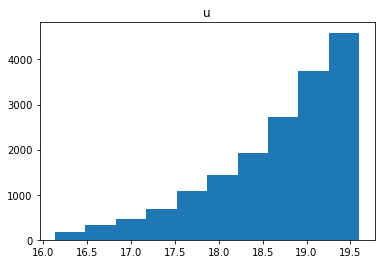

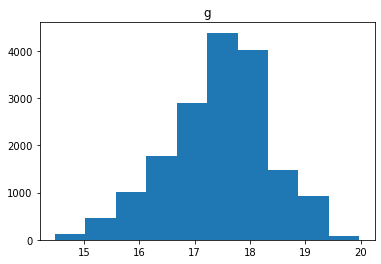

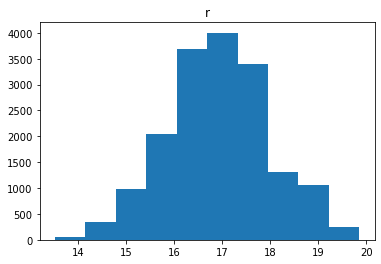

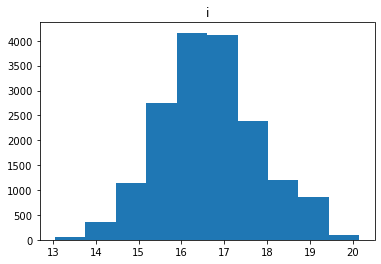

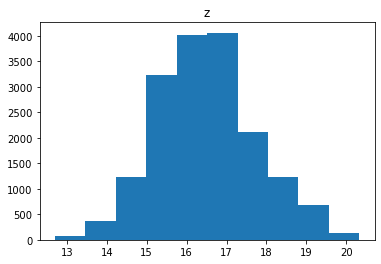

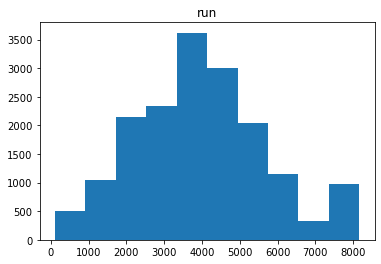

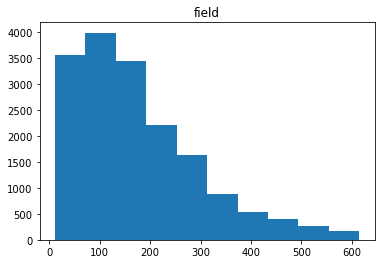

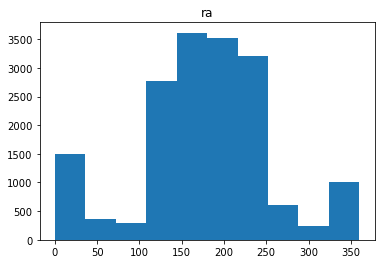

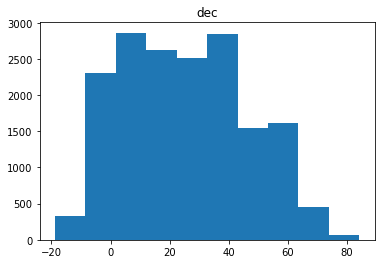

In [449]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [450]:
for i in df_cat.columns:
    plt.bar(df_cat[i])
    plt.title(i)
    plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
# Understand nature of the data .info() .describe()
# Histograms and boxplots 
# Value counts 
# Missing data 
# Correlation between the metrics 
# Explore interesting themes 
    # Wealthy survive? 
    # By location 
    # Age scatterplot with ticket price 
    # Young and wealthy Variable? 
    # Total spent? 
# Feature engineering 
# preprocess data together or use a transformer? 
    # use label for train and test   
# Scaling?

# Model Baseline 
# Model comparison with CV 

In [ ]:
# devide Data between numeric and categorical (ints and floats = num and string or object = cat)

In [115]:
train_data['band'].mean()

86.00806008132136

<AxesSubplot:xlabel='camcol', ylabel='band'>

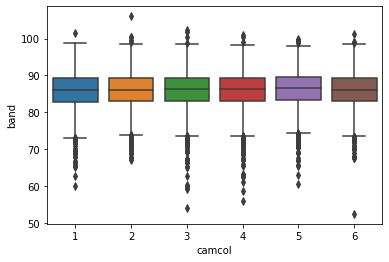

In [113]:
sns.boxplot(data=train_data,y='band',x='camcol')

<AxesSubplot:xlabel='sky_zone', ylabel='ra'>

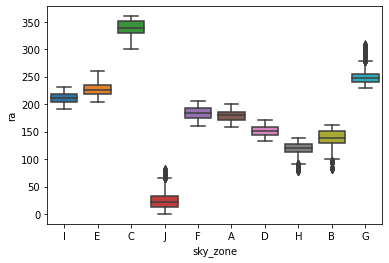

In [451]:
sns.boxplot(data=all_data,y='ra',x='sky_zone')

In [107]:
all_data.groupby(['sky_zone'])["ra"].mean()

sky_zone
A    179.352183
B    138.731101
C    339.020089
D    151.247119
E    226.958641
F    183.477288
G    249.426643
H    117.928054
I    211.574558
J     25.245311
Name: ra, dtype: float64

<AxesSubplot:xlabel='object_type', ylabel='i'>

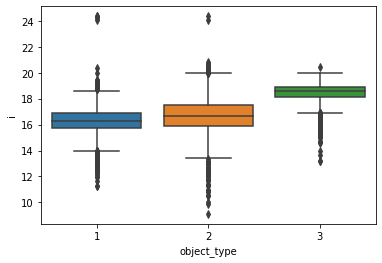

In [21]:
sns.boxplot(data=train_data,y='i',x='object_type')

<AxesSubplot:xlabel='object_type', ylabel='ra'>

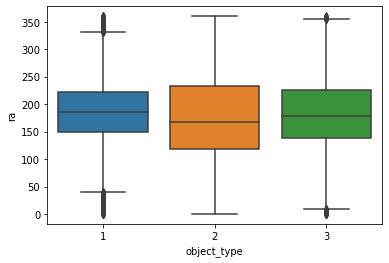

In [253]:
sns.boxplot(data=train_data,y='ra',x='object_type')

              u         g         r         i         z       run     field  \
u      1.000000  0.819928  0.660229  0.583204  0.523731  0.019054  0.009054   
g      0.819928  1.000000  0.961981  0.922257  0.888741  0.023150  0.008283   
r      0.660229  0.961981  1.000000  0.987827  0.974499  0.021785  0.003739   
i      0.583204  0.922257  0.987827  1.000000  0.991380  0.025941  0.000213   
z      0.523731  0.888741  0.974499  0.991380  1.000000  0.026924 -0.001168   
run    0.019054  0.023150  0.021785  0.025941  0.026924  1.000000 -0.170425   
field  0.009054  0.008283  0.003739  0.000213 -0.001168 -0.170425  1.000000   
ra     0.009278  0.008660  0.002951 -0.001853 -0.006850 -0.056827  0.018650   
dec   -0.029660 -0.010795 -0.000776  0.002341  0.008162 -0.066706 -0.079199   

             ra       dec  
u      0.009278 -0.029660  
g      0.008660 -0.010795  
r      0.002951 -0.000776  
i     -0.001853  0.002341  
z     -0.006850  0.008162  
run   -0.056827 -0.066706  
field  0.0186

<AxesSubplot:>

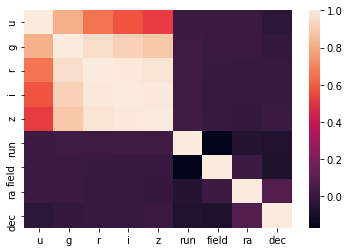

In [452]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [58]:
pd.pivot_table(train_data, index = 'object_type', values = ['run','ra','dec'])

,dec,ra,run
object_type,,,
1,25.000731,182.554999,3793.638619
2,25.187779,171.599856,4155.767350
3,26.034411,176.441835,4136.125263


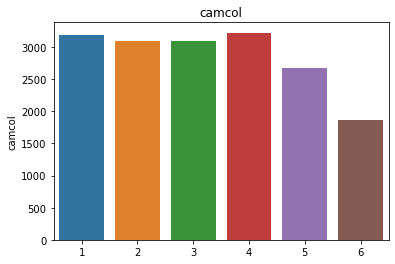

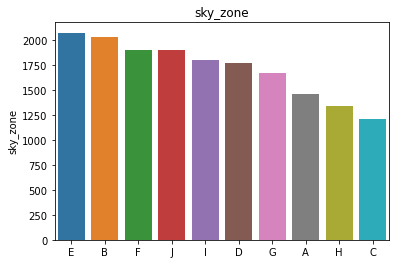

In [453]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [24]:
def f1(x):
    ra=x[0]
    skyzone=x[1]
    if pd.isnull(ra):
        if skyzone == 'B':
            return 138.731101
        elif skyzone == 'A':
            return 179.731101
        elif skyzone == 'D':
            return 151.247119
        elif skyzone == 'E':
            return 226.958641
        elif skyzone == 'F':
            return 183.477288
        elif skyzone == 'C':
            return 339.020089
        elif skyzone == 'G':
            return 249.426643
        elif skyzone == 'H':
            return 117.928054
        elif skyzone == 'I':
            return 211.574558
        else:
             return 25.245311
    else:
        return ra

In [454]:
all_data['ra']=all_data[['ra','sky_zone']].apply(f1,axis=1)

In [455]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29141 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           29141 non-null  int64  
 1   u            29141 non-null  float64
 2   g            29141 non-null  float64
 3   r            29141 non-null  float64
 4   i            29141 non-null  float64
 5   z            29141 non-null  float64
 6   run          29141 non-null  int64  
 7   camcol       29141 non-null  int64  
 8   field        29141 non-null  float64
 9   ra           29141 non-null  float64
 10  dec          29141 non-null  float64
 11  sky_zone     29141 non-null  object 
 12  object_type  17141 non-null  object 
 13  train_test   29141 non-null  int64  
 14  rerun        10800 non-null  float64
dtypes: float64(9), int64(4), object(2)
memory usage: 4.2+ MB


In [456]:
all_data.columns

Index(['id', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'ra', 'dec',
       'sky_zone', 'object_type', 'train_test', 'rerun'],
      dtype='object')

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())

#all_data.band
all_data['u'] = all_data['u']+all_data['g']+all_data['r']+all_data['i']+all_data['z']
all_data = all_data.drop(['u','g','r','i','z'], axis =1)
all_data['band'] = all_data['band'].fillna(all_data['band'].mean())
# log norm of fare (used)
#all_data['norm_fare'] = np.log(all_data.Fare+1)
#all_data['norm_fare'].hist()





#Split to train test again


In [457]:
all_data['u'] = all_data['u'].fillna(all_data['u'].mean())
all_data['g'] = all_data['g'].fillna(all_data['u'].mean())
all_data['r'] = all_data['r'].fillna(all_data['u'].mean())
all_data['i'] = all_data['i'].fillna(all_data['u'].mean())
all_data['z'] = all_data['z'].fillna(all_data['u'].mean())

In [458]:
all_data.columns

Index(['id', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'ra', 'dec',
       'sky_zone', 'object_type', 'train_test', 'rerun'],
      dtype='object')

In [652]:
#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[[ 'u','g','r','i','z','ra',
        'train_test']])
all_dummies['object_type'] = all_data['object_type']
all_dummies

,u,g,r,i,z,ra,train_test,object_type
0,18.45886,17.24552,16.65724,16.27922,16.07007,214.002267,1,1
1,18.50274,17.50821,17.19507,17.07868,17.08054,220.688333,1,2
2,18.69451,17.30333,16.48301,16.05570,15.75763,249.118754,1,1
3,19.34373,18.32701,17.97602,17.82627,17.75770,330.633293,1,2
4,19.33328,18.13790,17.58180,17.21341,16.99397,339.020089,1,1
...,...,...,...,...,...,...,...,...
11995,19.36869,18.00328,18.08442,18.19245,18.25524,292.277001,0,NaN
11996,17.91410,16.40229,15.63961,15.17997,14.90172,132.478684,0,NaN
11997,19.19980,17.49400,16.54597,16.02917,15.60198,20.388668,0,NaN
11998,18.94944,17.76070,17.59710,17.55043,17.55842,258.789492,0,NaN


In [653]:
X_T = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_T = all_data[all_data.train_test==1].object_type
y_T.shape

(17141,)

In [654]:
test = test.drop(['object_type'], axis =1)

In [655]:
test

,u,g,r,i,z,ra
0,17.77804,16.40338,15.69551,15.51029,15.41648,105.295891
1,19.17646,18.08458,17.01220,16.35536,15.94323,178.795262
2,18.97518,17.53847,16.98310,16.66949,16.62293,226.759800
3,19.48538,17.55220,16.57528,16.13803,15.76700,177.735503
4,19.09216,17.81581,17.10279,16.66293,16.48639,132.988928
...,...,...,...,...,...,...
11995,19.36869,18.00328,18.08442,18.19245,18.25524,292.277001
11996,17.91410,16.40229,15.63961,15.17997,14.90172,132.478684
11997,19.19980,17.49400,16.54597,16.02917,15.60198,20.388668
11998,18.94944,17.76070,17.59710,17.55043,17.55842,258.789492


In [656]:
X_T = X_T.drop(['object_type'],axis=1)

In [657]:
y_T = y_T.astype('int')

In [658]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_T, y_T, test_size = 0.33, random_state = 42)

In [659]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((11484, 6), (5657, 6))

In [660]:
X_train

,u,g,r,i,z,ra
11870,16.92593,15.53495,14.81468,14.39031,14.07576,39.542193
10346,18.70181,17.33557,16.79667,16.63337,16.58250,172.637854
17463,17.44752,16.19886,15.57781,15.23023,14.98586,192.709052
17005,19.57093,18.03618,17.37953,16.95993,16.66891,195.028108
16255,18.46703,17.26136,17.15802,17.14555,17.17502,312.836160
...,...,...,...,...,...,...
11864,19.43259,19.40827,19.27391,19.17638,19.28618,167.661792
12577,18.45278,17.53133,17.22200,17.00956,16.88108,122.377309
5651,18.83817,16.91757,15.94397,15.46176,15.11189,17.638379
903,18.42989,16.72645,15.86598,15.42127,15.08526,241.424216


In [661]:
y_train

11870    1
10346    2
17463    1
17005    1
16255    2
        ..
11864    3
12577    1
5651     1
903      1
16599    2
Name: object_type, Length: 11484, dtype: int32

# Decision Tree

In [662]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = DecisionTreeClassifier(random_state = 42)


In [663]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [664]:
y_pred = classifier.predict(X_test)

In [665]:
print(confusion_matrix(y_test, y_pred))
print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

[[2619  227   44]
 [ 235 1908   26]
 [  51   31  516]]
Test set score: 0.8915


In [666]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9302


In [667]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=42)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [668]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

z     0.255476
r     0.176286
i     0.163822
u     0.157151
g     0.152369
ra    0.094896
dtype: float64

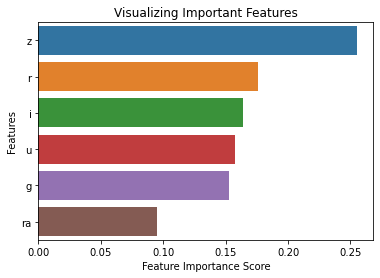

In [669]:
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()


# XGBOOST

In [670]:
import xgboost

[20:03:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.9410


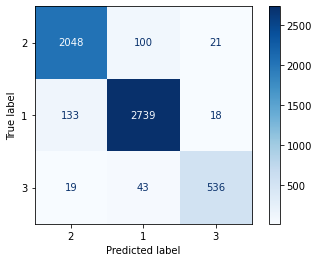

In [671]:
from sklearn.metrics import plot_confusion_matrix

xgb_tree = xgboost.XGBClassifier(objective="multi:logistic", random_state=42)
xgb_tree.fit(X_train, y_train)
predictions = xgb_tree.predict(X_test)

print("Accuracy = {0:.4f}".format(accuracy_score(y_test,xgb_tree.predict(X_test))))
plot_confusion_matrix(xgb_tree, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

In [672]:
xgans = xgb_tree.predict(test)

In [673]:
xgbattempt = test_data

In [674]:
xgbattempt['object_type'] = xgans

In [675]:
for i in range(len(xgbattempt['object_type'])):
    if xgbattempt['object_type'][i] == 1:
        xgbattempt['object_type'][i] = 'GALAXY'
    elif xgbattempt['object_type'][i] == 2:
        xgbattempt['object_type'][i] = 'STAR'
    else:
        xgbattempt['object_type'][i] = 'QUASAR'

In [676]:
xgbattempt[['id','object_type']].to_csv('attempt9.csv',index= False)

<AxesSubplot:>

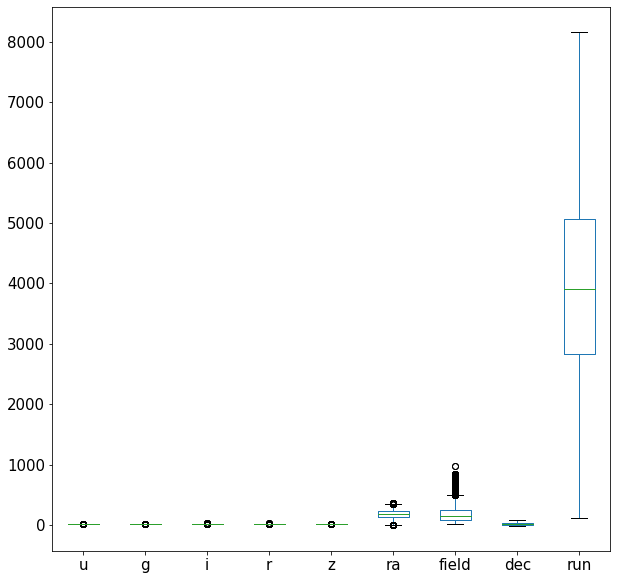

In [56]:
plt.figure(figsize=(10,10))
X_T.boxplot(['u','g','i','r','z', 'ra','field','dec','run'], grid=False, fontsize=15)

In [485]:
Xst = X_train

In [486]:
Xtst = X_test

In [487]:
SVCTest = test

In [488]:
ST = Xst.values # We do not take the class label
ST

array([[ 1.69259300e+01,  1.55349500e+01,  1.48146800e+01, ...,
         7.90800000e+03,  3.95421927e+01, -7.36286573e+00],
       [ 1.87018100e+01,  1.73355700e+01,  1.67966700e+01, ...,
         5.97600000e+03,  1.72637854e+02, -6.21110927e+00],
       [ 1.74475200e+01,  1.61988600e+01,  1.55778100e+01, ...,
         3.71200000e+03,  1.92709052e+02,  5.73444803e+01],
       ...,
       [ 1.88381700e+01,  1.69175700e+01,  1.59439700e+01, ...,
         4.82900000e+03,  1.76383789e+01,  1.40228687e+01],
       [ 1.84298900e+01,  1.67264500e+01,  1.58659800e+01, ...,
         3.22500000e+03,  2.41424216e+02,  4.42333727e+01],
       [ 1.92233600e+01,  1.82257800e+01,  1.78463000e+01, ...,
         4.82900000e+03,  1.74111209e+01,  1.64281215e+01]])

In [489]:
TST = Xtst.values # We do not take the class label
TST

array([[  19.17167   ,   17.95456   ,   17.87904   , ..., 6004.        ,
         120.41395962,    6.83136888],
       [  19.55344   ,   18.34906   ,   18.01021   , ..., 6004.        ,
         131.56091777,   10.97703252],
       [  19.01632   ,   18.00202   ,   17.60062   , ..., 2830.        ,
         165.37488569,   50.98184455],
       ...,
       [  19.25991   ,   17.32903   ,   16.4254    , ..., 4646.        ,
         206.3362179 ,   29.5113358 ],
       [  17.66068   ,   15.92288   ,   15.07515   , ..., 2964.        ,
         229.6620833 ,   40.75006977],
       [  18.8504    ,   16.95148   ,   15.99324   , ..., 1402.        ,
         114.7521842 ,   39.69802146]])

In [490]:
SVC = SVCTest.values

In [491]:
from sklearn.preprocessing import StandardScaler

Xst.iloc[:,0:9] = StandardScaler().fit_transform(ST) # normalizing the features
df_st = Xst


In [492]:
from sklearn.preprocessing import StandardScaler

Xtst.iloc[:,0:9] = StandardScaler().fit_transform(TST) # normalizing the features
df_test = Xtst


In [493]:
SVCTest.iloc[:,0:9] = StandardScaler().fit_transform(SVC) # normalizing the features
svcTest = SVCTest

<AxesSubplot:>

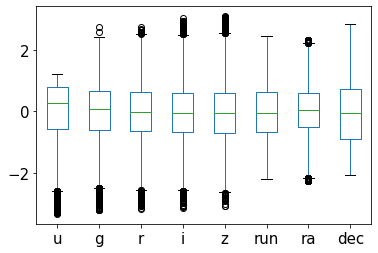

In [494]:
df_st.boxplot(grid=False, fontsize=15)

<AxesSubplot:>

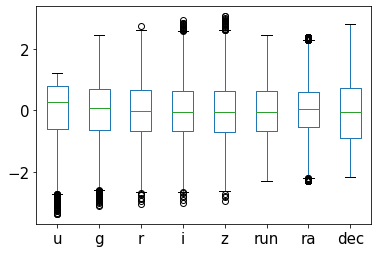

In [495]:
df_test.boxplot(grid=False, fontsize=15)

<AxesSubplot:>

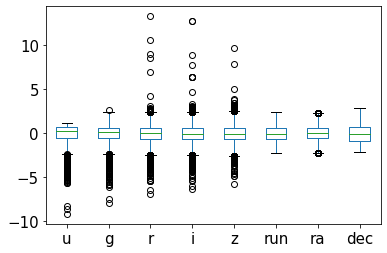

In [496]:
svcTest.boxplot(grid=False, fontsize=15)

In [497]:
from sklearn.svm import SVC
from sklearn import svm

In [498]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.5,1,5,10], "gamma":[0.01,0.0001,0.00001]}

estimator = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=5)
estimator.fit(df_st, y_train);

The best parameters are {'C': 10, 'gamma': 0.01} with a score of 0.95


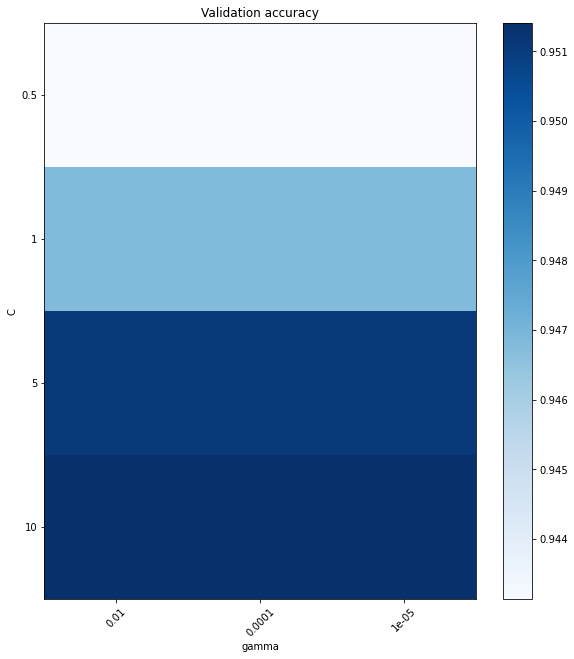

In [499]:
print("The best parameters are %s with a score of %0.2f"
      % (estimator.best_params_, estimator.best_score_))


scores = estimator.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# Draw heatmap of the validation accuracy as a function of gamma and C

plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Validation accuracy')
plt.show()

In [500]:
C = 10

clf = svm.SVC(C,kernel='linear', gamma = 0.01)
clf.fit(df_st, y_train)

SVC(C=10, gamma=0.01, kernel='linear')

Naive Bayes Accuracy = 0.9526250662895528


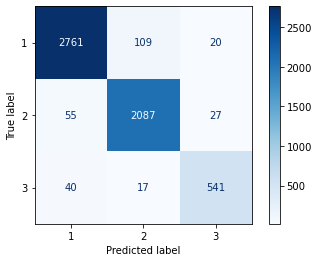

In [501]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

# Predict labels on test
predictions = clf.predict(df_test)

print("Naive Bayes Accuracy = {}".format(accuracy_score(clf.predict(X_test), y_test)))
plot_confusion_matrix(clf, X_test, y_test, [1,2,3], cmap=plt.cm.Blues);

In [1]:
svcans = clf.predict(svcTest)

NameError: name 'clf' is not defined

In [503]:
svcattempt = test_data

In [504]:
svcattempt['object_type'] = svcans

In [505]:
for i in range(len(svcattempt['object_type'])):
    if svcattempt['object_type'][i] == 1:
        svcattempt['object_type'][i] = 'GALAXY'
    elif svcattempt['object_type'][i] == 2:
        svcattempt['object_type'][i] = 'STAR'
    else:
        svcattempt['object_type'][i] = 'QUASAR'

In [506]:
svcattempt[['id','object_type']].to_csv('attempt3.csv',index= False)